In [2]:
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read in Data

In [9]:
df_user = pd.read_csv('data/user_table.csv')

In [10]:
df_user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [11]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
user_id    452867 non-null int64
sex        452867 non-null object
age        452867 non-null int64
country    452867 non-null object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [12]:
df_test = pd.read_csv('data/test_table.csv')

In [13]:
df_test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


# Merge two Datasets

In [15]:
# Merget the user and test dataset.
df = pd.merge(df_user, df_test, how='outer')

In [16]:
df.head()

,user_id,sex,age,country,date,source,device,browser_language,ads_channel,browser,conversion,test
0,765821,M,20.0,Mexico,2015-12-02,Ads,Mobile,ES,Yahoo,Android_App,0,1
1,343561,F,27.0,Nicaragua,2015-12-04,Ads,Web,ES,Facebook,Safari,0,0
2,118744,M,23.0,Colombia,2015-11-30,Ads,Mobile,ES,Facebook,Android_App,0,1
3,987753,F,27.0,Venezuela,2015-12-04,SEO,Web,ES,NaN,IE,0,1
4,554597,F,20.0,Spain,2015-12-04,Direct,Web,ES,NaN,Chrome,0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
user_id             453321 non-null int64
sex                 452867 non-null object
age                 452867 non-null float64
country             452867 non-null object
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: float64(1), int64(3), object(8)
memory usage: 45.0+ MB


# Compare Conversion Rates in Control and Test Experiment.

In [77]:
# First to extract the data from only control experiment.
df_test0 = df[df.test == 0].groupby('conversion').country.value_counts().unstack()

In [78]:
df_test0

country,Argentina,Bolivia,Chile,Colombia,Costa Rica,Ecuador,El Salvador,Guatemala,Honduras,Mexico,Nicaragua,Panama,Paraguay,Peru,Spain,Uruguay,Venezuela
conversion,,,,,,,,,,,,,,,,,
0,9215,5276,9379,25677,2521,7641,3888,7236,4139,61031,3239,1874,3473,16027,47654,410,15336
1,141,274,474,1411,139,395,220,386,222,3178,180,92,177,842,4128,5,813


In [79]:
# Since we maily compare the conversion rate in cotrol and test experiment in the countries\
# except Spain, we drop Spain.
df_test0.drop('Spain', axis=1, inplace=True)

In [80]:
# The mean of the conversion rate in control experiment is around 0.048.
df_test0_mean = df_test0.loc[1,:].sum() / df_test0.values.sum()
df_test0_mean

0.048291790557495239

In [88]:
df.groupby('test').conversion.mean()

test
0    0.055179
1    0.043425
Name: conversion, dtype: float64

In [55]:
df_test0_result = df_test0.apply(lambda x: x[1]/x.sum())

In [56]:
# Argentina and Uruguay have much lower conversion rate compared with other countries.
df_test0_result

country
Argentina      0.015071
Bolivia        0.049369
Chile          0.048107
Colombia       0.052089
Costa Rica     0.052256
Ecuador        0.049154
El Salvador    0.053554
Guatemala      0.050643
Honduras       0.050906
Mexico         0.049495
Nicaragua      0.052647
Panama         0.046796
Paraguay       0.048493
Peru           0.049914
Uruguay        0.012048
Venezuela      0.050344
dtype: float64

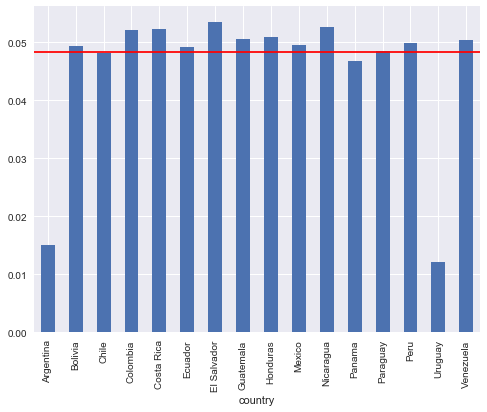

In [58]:
# Plot to show conversion rate comparisons of differnet contries in control experiment.
plt.rcParams['figure.figsize'] = (8,6)
df_test0_result.plot(kind='bar')
plt.axhline(df_test0_mean, color='r')
plt.show()

In [81]:
# Extract the data from test experiment.
df_test1 = df[df.test == 1].groupby('conversion').country.value_counts().unstack()

In [82]:
df_test1

country,Argentina,Bolivia,Chile,Colombia,Costa Rica,Ecuador,El Salvador,Guatemala,Honduras,Mexico,Nicaragua,Panama,Paraguay,Peru,Uruguay,Venezuela
conversion,,,,,,,,,,,,,,,,
0,36864,5307,9377,25608,2504,7474,3872,7138,4007,60985,3125,1887,3515,15947,3671,15126
1,513,267,507,1364,145,385,195,365,200,3290,179,98,182,850,48,779


In [64]:
# The mean of the conversion rate in control experiment is around 0.043.
df_test1_mean = df_test1.loc[1,:].sum()/df_test1.values.sum()
df_test1_mean

0.043411161678422794

In [65]:
df_test1_result = df_test1.apply(lambda x: x[1]/x.sum())

In [66]:
df_test1_result

country
Argentina      0.013725
Bolivia        0.047901
Chile          0.051295
Colombia       0.050571
Costa Rica     0.054738
Ecuador        0.048988
El Salvador    0.047947
Guatemala      0.048647
Honduras       0.047540
Mexico         0.051186
Nicaragua      0.054177
Panama         0.049370
Paraguay       0.049229
Peru           0.050604
Uruguay        0.012907
Venezuela      0.048978
dtype: float64

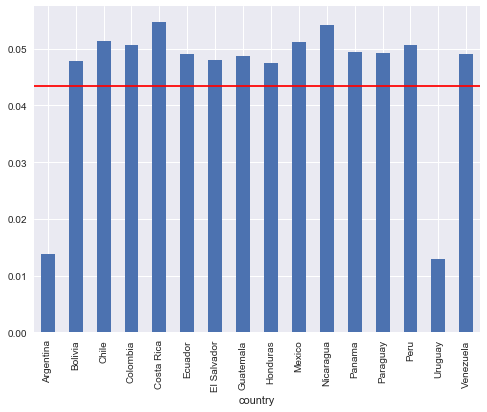

In [67]:
plt.rcParams['figure.figsize'] = (8,6)
df_test1_result.plot(kind='bar')
plt.axhline(df_test1_mean, color='r')
plt.show()

In [83]:
# From EDA and Analysis above, the mean conversion rate in control experiment is 0.048, while\
# is 0.043 in test experiment. So it seems that we can say the old version without localization\
# is better, but is that true??? Let us dig deeper!

In [85]:
df_test0.sum(axis=0)

country
Argentina       9356
Bolivia         5550
Chile           9853
Colombia       27088
Costa Rica      2660
Ecuador         8036
El Salvador     4108
Guatemala       7622
Honduras        4361
Mexico         64209
Nicaragua       3419
Panama          1966
Paraguay        3650
Peru           16869
Uruguay          415
Venezuela      16149
dtype: int64

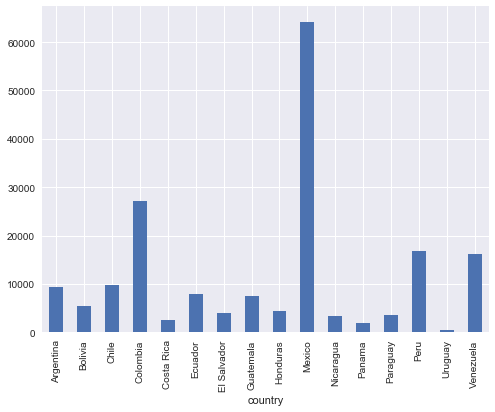

In [86]:
df_test0.sum(axis=0).plot(kind='bar')

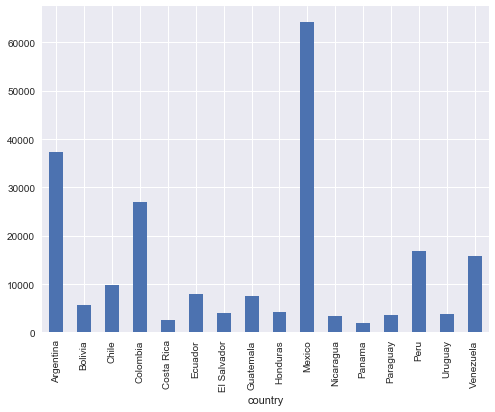

In [87]:
df_test1.sum(axis=0).plot(kind='bar')

In [89]:
df_test1.sum(axis=0)[0]

country
Argentina      37377
Bolivia         5574
Chile           9884
Colombia       26972
Costa Rica      2649
Ecuador         7859
El Salvador     4067
Guatemala       7503
Honduras        4207
Mexico         64275
Nicaragua       3304
Panama          1985
Paraguay        3697
Peru           16797
Uruguay         3719
Venezuela      15905
dtype: int64

In [92]:
df_test1.sum(axis=0)[0]/df_test1.values.sum()

0.17322290915494917

In [96]:
df_test1.sum(axis=0)['Uruguay']/df_test1.values.sum()

0.017235626164412765

In [93]:
df_test0.sum(axis=0)[0]/df_test0.values.sum()

0.050488098385956581

In [94]:
df_test1.sum(axis=0)['Uruguay']/df_test1.values.sum()

0.017235626164412765

In [ ]:
'''Argentina and Uruguay have relatively low conversion than others. While Uruguay only accounts for 1% of total

observations, 12% of observations are collected from Argentina. If there is any bias in Argentina's data, it may \
impact the overall results.'''